<div style='text-align: center;'>
<img src="images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class - Week 7

## Department of Mathematics

# This Week

- Demo 7.1 Binomial Trees
- Demo 7.2 Evaluating Convergence Properties

# Demo 7.1: Binomial Trees

The two most popular models for using binomial trees to price options are 
- Cox, Ross and Rubinstein (1977) (CRR for short) whose extra degree of freedom is to set
$$
ud=1
$$
thus
$$
u=e^{\sigma \sqrt{\Delta t}},\quad d=e^{-\sigma\sqrt{\Delta t}},\quad 
q=\frac{e^{r\Delta t}-d}{u-d}
$$

- Rendleman and Bartter (1979) who choose:
$$q=\frac12$$
and so 
$$u=e^{(r-\tfrac12\sigma^2)\Delta t+\sigma\sqrt{\Delta t}},\quad 
d=e^{(r-\tfrac12\sigma^2)\Delta t-\sigma \sqrt{\Delta t}}.\quad
$$

We wish to generate a stock price tree, so denote the value of the underlying asset after timestep $i$ and upstate $j$ by $S_{ij}$ and we have that:
$$S_{ij}=S_0u^jd^{i-j}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm
from math import exp, sqrt, log

 First declare and initialise the Black Scholes parameters for your chosen problem. Here we are going to value a 
Black Scholes vanilla European call option with, $S_0=100$, $X=100$, $T=1$, $r=0.06$ and $\sigma=0.2$, so declare variables
for each of these. Next add in an integer to store the number of steps in the tree and call it $n$.
Finally add in some local variable to describe the tree, so we have the timestep length $dt$,
$u$, $d$ and $q$. 

In [2]:
# stock parameters
S_0 = 100 # initial stick price

# call option contract parameters
X = 100 # strike price
T = 1.0 # time to expiry

# market parameters
r = 0.06 # risk free interest rate

# model parameters
sigma = 0.2 #  volatility

# steps in the tree
n=3

# local stuff
dt = T/n
u = exp(sigma*sqrt(dt))
d = 1./u
q = (exp(r*dt) - d)/(u-d)
print("dt=",dt,";u=",u,";d=",d,";q=",q)

dt= 0.3333333333333333 ;u= 1.1224009024456676 ;d= 0.8909472522884107 ;q= 0.5584448015856557


Next we need to create some storage for the values of the stock at each node in the tree. Declare an array `stock_tree` with shape $(n+1)\times(n+1)$, 
into which we will place our stock price nodes.
 

In [3]:
stock_tree = np.zeros(shape=(n+1,n+1))
stock_tree

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Now use a `for` loop and the function `np.pow` to input the value of the stock at each node in the tree, 
where $S_{i,j} \rightarrow $`stock_tree[i][j]`.

In [4]:

for i in range(0,n+1):
    for j in range(0,i+1):
        stock_tree[i][j] = S_0*pow(u,j)*pow(d,i-j)
        
stock_tree

array([[100.        ,   0.        ,   0.        ,   0.        ],
       [ 89.09472523, 112.24009024,   0.        ,   0.        ],
       [ 79.37870064, 100.        , 125.97837858,   0.        ],
       [ 70.72223522,  89.09472523, 112.24009024, 141.39824581]])

Compare the values with those from the example in the lectures.

Let us generate a simple example so that we can compare results at every stage to something that we can work out on paper. 
 This is an important idea in debugging, to solve the problem and do all of your bug checking on a small scale **before** attempting the full problem.

Now declare an array which shall hold the values of the option and set it to the same shape as `stock_tree`. Here we use the same relation

$V_{i,j} \rightarrow $`value_tree[i][j]`

In [5]:
value_tree = np.zeros(shape=(n+1,n+1))

Now fill in the final values of the tree, given that we have already first generated the stock tree:
 $$
 V_{n,j}= \mathrm{payoff}(S_{n,j}),
 $$
 where payoff is the appropriate function for the type of option we are solving for.

In [6]:
for j in range(0,n+1):
    value_tree[n][j] = max( stock_tree[n][j] - X , 0.0)

Now we need to loop **backwards** through the tree to generate the value at each node using the equation:
 $$
 V_{ij}=e^{-r\Delta t}(qV_{i+1,j+1}+(1-q)V_{i+1,j}).
 $$
 

# Tasks

- Write `for` loops to move backwards through the vector array caculating the value of the option at each node.
- Print out the tree to screen (with $n=3$) and compare to the simple example from the notes to check your code is working.
- If your values don't match - try to work out why!!
- Now print out the value at $(0,0)$ increasing the number of steps in the tree. Do the results look feasible? Compare them against the exact values from the formula.
- Create a function returning the value of the binomial tree for a set of given parameters.
- Write a code storing two time-levels, and compare (at every stage if needed) with the previous code.
- Is it possible to store just one time-level? Try to write a code for this.
- Do you notice any difference (time taken for computation) between the codes with different storage requirements?
- Try speeding the code up with `numba` or `cython` libraries

#### The case $n=3$ and comparison with the example in Chapter 4 of the notes
Work backwards through a binomial tree of asset values to get option values

In [7]:
# Begin by initialising at the entries corresponding to the expiration time T.
value_tree = np.zeros(shape=(n+1,n+1))
for j in range(n+1):
    value_tree[n][j] = max( stock_tree[n][j] - X , 0.0)

# Now work backwards through the tree
i = n-1 
discount_factor = exp(-r*dt ) # One time step worth of discounting
while i >= 0:
    for j in range(i+1):
        value_tree[i][j] = q*value_tree[i+1][j+1] + (1 - q)*value_tree[i+1][j]
        value_tree[i][j] *= discount_factor

    i = i - 1 # Move on to the next column

print( value_tree )

[[11.55197318  0.          0.          0.        ]
 [ 3.66752722 18.20398861  0.          0.        ]
 [ 0.          6.70006449 27.95851125  0.        ]
 [ 0.          0.         12.24009024 41.39824581]]


This is in excellent agreement with the Example in Chapter 4 of the notes.

#### Building functions and increasing $n$
In practice, it's simpler to bundle up everything into a function and use that to explore convergence.

In [8]:
def valueTree( S_0, r, sigma, X, T, n ):
    # Work out the time step and other useful numbers
    dt = T/n
    u = exp(sigma*sqrt(dt))
    d = 1./u
    q = (exp(r*dt) - d)/(u-d)

    # Construct the stock tree
    stock_tree = np.zeros(shape=(n+1,n+1))
    for i in range(0,n+1):
        for j in range(0,i+1):
            stock_tree[i][j] = S_0*pow(u,j)*pow(d,i-j)

    # Then the value tree
    value_tree = np.zeros(shape=(n+1,n+1))
    for j in range(n+1):
        value_tree[n][j] = max( stock_tree[n][j] - X , 0.0)

    i = n-1 
    discount_factor = exp(-r*dt )
    while i >= 0:
        for j in range(i+1):
            value_tree[i][j] = q*value_tree[i+1][j+1] + (1 - q)*value_tree[i+1][j]
            value_tree[i][j] *= discount_factor
    
        i = i - 1 # Move on to the next column

    # Return the value tree
    return value_tree

# Make a lambda that gets the value at t=0 as a function of n.
val_vs_n = lambda n: valueTree( S_0, r, sigma, X, T, n )[0][0]

# Test it for n = 3
val_vs_n( 3 )

11.551973176964253

Test a range of values of $n$ and compare to the analytic result.

In [9]:
n_vals = [int(pow(2,j)) for j in range(2,14)]
num_n_vals = len(n_vals)
print( n_vals )

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


In [10]:
V_vals = np.array( [val_vs_n(n) for n in n_vals] )

We'll want to see how well the values form our binomial trees agree with those from the analytic solution, so recall that fir a vanilla European call option the value is given by
$$
C(S,t) = S N(d_1) − Xe^{−r(T−t)}N(d_2)
$$
where $N$ is the cumulative density function of the satndard normal,
$$
    N(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x e^{-z^2/2} \, dz
$$
and the $d_j$ are given by
$$
    d_1 = \frac{\log(S/X) + (r + \sigma^2/2)(T -t)}{\sigma\sqrt{T-t}}
    \qquad \mbox{and} \qquad
    d_2 = \frac{\log(S/X) + (r - \sigma^2/2)(T -t)}{\sigma\sqrt{T-t}}
$$

In [11]:
# Compute the analytic result for C(S_0, t=0)
d1 = (log(S_0/X) + (r + 0.5*sigma*sigma*T))/(sigma * sqrt(T))
d2 = (log(S_0/X) + (r - 0.5*sigma*sigma*T))/(sigma * sqrt(T))

trueVal = S_0*norm.cdf(d1) - X*exp(-r*T)*norm.cdf(d2)
trueVal

10.989549152625997

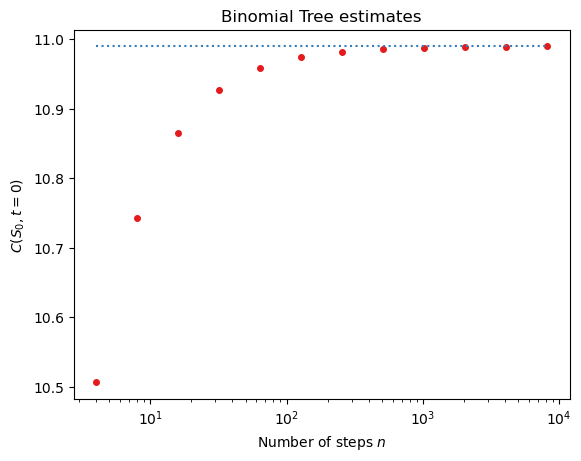

In [12]:
# Plot those puppies
import matplotlib.pyplot as plt

# Choose some pleasing colors from the Brewer palettes
cmap = plt.colormaps["Set1"]
set_pal = cmap(range(0,9))

# Plot the estimates of V as a function of n
plt.semilogx( n_vals, V_vals, color=set_pal[0], marker=".", markersize=8, linestyle='none' )

# Add a dotted line at analytic result
plt.semilogx( [n_vals[0], n_vals[-1]], [trueVal, trueVal], color=set_pal[1], linestyle='dotted' )

# Add labels and a title
plt.xlabel( "Number of steps $n$" )
plt.ylabel( "$C(S_0, t=0)$" )
plt.title( "Binomial Tree estimates" )

plt.show()

#### A routine that uses less storage

Given that we can compute 
   * any value in the stock tree directly from $S_0$, $u$ and $d$,
   * any column in the value tree from the one before it

It should be possible to do everything with a single vector of length $n+1$.

In [13]:
from numba import njit

@njit
def callOptionValue( S_0, r, sigma, X, T, n ):
    # Work out the time step and other useful numbers
    dt = T/n
    u = exp(sigma*sqrt(dt))
    d = 1./u
    q = (exp(r*dt) - d)/(u-d)

    # Work out the value of the option at T for 
    # each of the (n+1) values in the final column of the stock tree
    option_val = np.zeros( n + 1 )
    for j in range(n+1):
        stock_val = S_0 * pow(u, j) * pow(d, n-j) ;
        option_val[j] = max( stock_val - X, 0.0 )

    # Now construct the next column to the left in the
    # tree, replacing the entries in option_val as one goes
    discount_factor = exp(-r*dt )
    for i in range(n):
        n_nodes = n - i
        for j in range(n_nodes):
            option_val[j] = q*option_val[j+1] + (1 - q)*option_val[j]
            option_val[j] *= discount_factor

    # Return the sole t=0 value in the tree.
    return( option_val[0] )

In [14]:
# Make a lambda that gets the value at t=0 as a function of n.
val_vs_n_too = lambda n: callOptionValue( S_0, r, sigma, X, T, n )

# Rerun the estimates underpinning the figure above and see how well they agree
V_vals_too = np.array( [val_vs_n_too(n) for n in n_vals] )
V_vals_too - V_vals

array([ 0.00000000e+00, -1.42108547e-14,  0.00000000e+00, -1.77635684e-14,
        5.32907052e-14,  2.30926389e-13, -4.08562073e-14,  2.41584530e-13,
        4.12114787e-13,  8.84625706e-13, -2.17070806e-12,  2.08011386e-12])

In [15]:
# Do some timing experiments
from timeit import timeit

n = 512
nReps = 100
full_tree_time = timeit( "val_vs_n(n)", number=nReps, globals=globals() )
print( f"{nReps} repetitions of val_vs_n({n}) took {full_tree_time:.2f} seconds." )

single_col_time = timeit( "val_vs_n_too(n)", number=nReps, globals=globals() )
print( f"{nReps} repetitions of val_vs_n_too({n}) took {single_col_time:.6f} seconds." )

ratio = full_tree_time/single_col_time
print( f"That's a speedup by a factor of around {ratio:.0f}." )

100 repetitions of val_vs_n(512) took 12.07 seconds.
100 repetitions of val_vs_n_too(512) took 0.003397 seconds.
That's a speedup by a factor of around 3552.


Between more efficient use of memory and the wonders of `njit`, the second version is thousands of times faster.

# Demo 7.2: Evaluating Convergence Properties

Taking the code from last time, you could write your binomial code to take the payoff as an argument to the function:

In [16]:
def binomialBlackScholes(S_0,T,r,sigma,payoff,n):
    # setup
    dt = T/n
    u = np.exp(sigma*np.sqrt(dt))
    d = 1./u
    q = (np.exp(r*dt) - d)/(u-d)
    stock_tree = np.zeros(shape=(n+1,n+1))
    value_tree = np.zeros(shape=(n+1,n+1))
    for i in range(0,n+1):
        for j in range(0,i+1):
            stock_tree[i][j] = S_0*pow(u,j)*pow(d,i-j)
    # terminal conditions
    for j in range(0,n+1):
        value_tree[n][j] = payoff(stock_tree[n][j])
    # solve
    for i in range(n-1,-1,-1):
        for j in range(0,i+1):
            value_tree[i][j] = np.exp(-r*dt)*( q*value_tree[i+1][j+1] + (1-q)*value_tree[i+1][j] )
    return value_tree[0][0]

In [17]:
 # Here's a faster version
def binomialBlackScholesToo( S_0, r, sigma, T, payoff, n ):
    # Work out the time step and other useful numbers
    dt = T/n
    u = exp(sigma*sqrt(dt))
    d = 1./u
    q = (exp(r*dt) - d)/(u-d)

    # Work out the value of the option at T for 
    # each of the (n+1) values in the final column of the stock tree
    option_val = np.zeros( n + 1 )
    for j in range(n+1):
        stock_val = S_0 * pow(u, j) * pow(d, n-j) ;
        option_val[j] = payoff( stock_val )

    # Now construct the next column to the left in the
    # tree, replacing the entries in option_val as one goes
    discount_factor = exp(-r*dt )
    for i in range(n):
        n_nodes = n - i
        for j in range(n_nodes):
            option_val[j] = q*option_val[j+1] + (1 - q)*option_val[j]
            option_val[j] *= discount_factor

    # Return the sole t=0 value in the tree.
    return( option_val[0] )

An example using this code would be:

In [18]:
callPayoff = lambda S:max(S-X,0.0)

In [38]:
S_0 = X
print(binomialBlackScholesToo(S_0,r,sigma, T, callPayoff,3))

11.551973176964253


Now we wish to investigate what happens when $N$ is increasing. Write a loop in your code to record
$N$ and the resulting value $V$ in some arrays so they can be plotted.

In [39]:
no_of_results = 491

nArray = np.zeros(no_of_results)
vArray = np.zeros(no_of_results)
for i in range(0,no_of_results):
    nArray[i] = 10+i
    vArray[i] = binomialBlackScholesToo(S_0,r,sigma, T, callPayoff, int(nArray[i]))

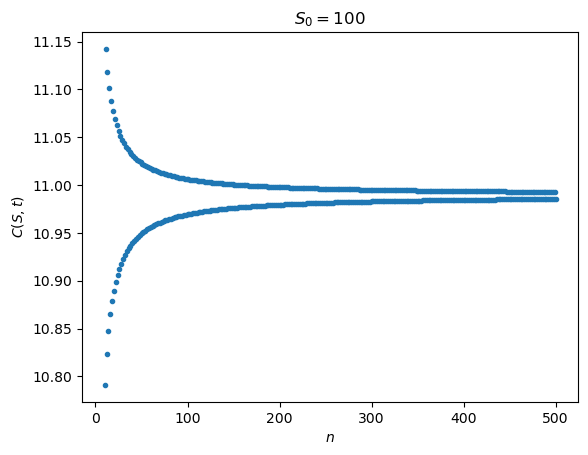

In [40]:
plt.plot(nArray,vArray,'.')
plt.xlabel('$n$')
plt.ylabel('$C(S,t)$')
plt.title( f'$S_0 = ${S_0}')

plt.show()

The pattern can be explained by realising that the nodes at terminal time will either be placed exactly on the strike price, or above/below depending on whether the 
number of steps is odd or even.  We will see quite a different pattern if you choose $S_0 \neq X$, so for example, set $S_0=92.346$ in your code and rerun the results.

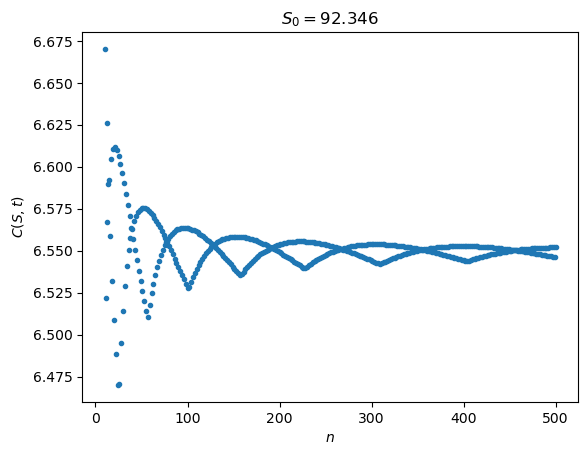

In [46]:
no_of_results = 491

S_0 = 92.346
nArray = np.zeros(no_of_results)
vArray = np.zeros(no_of_results)
for i in range(0,no_of_results):
    nArray[i] = 10+i
    vArray[i] = binomialBlackScholesToo(S_0, r, sigma, T,callPayoff,int(nArray[i]))
  
plt.plot(nArray,vArray,'.')
plt.xlabel('$n$')
plt.ylabel('$C(S,t)$')
plt.title( f'$S_0 = ${S_0}')

plt.show()

This time we see *humps* as well as an odd-even effect. The humps are
again caused by the positioning of the grid nodes relative to the strike price. Although the convergence of the tree is $O(1/n)$, the humps make it very difficult to achieve high 
accuracy. There are several papers that try to address this, one way is to adjust the position of the nodes and others try to smooth the payoff at maturity to gain smoother convergence.

# Tasks

- Can you estimate the convergence rate?
- Assume that the payoff of the option is
$$
V(S,T) = \left\{\begin{array}{cc}
0 & \text{ if } S<X\\
1 & \text{ if } S\geq X
\end{array}\right.
$$
Plot out the solution to this problem with a binomial tree for different values of $N$, in the case where $S_0=X$ and $S_0\neq X $. Can you explain the results?
- Now try setting
$$
V_{n,j} = \left\{\begin{array}{ccc}
0 & \text{ if } &S_j^N<2X - S^N_{j+1}\\
&&\\
\frac{S^N_{j+1} + S^N_j - 2X}{S^N_{j+1}-S^N_{j-1}} & \text{ if } &2X - S^N_{j+1}\leq  S_j^N  \leq 2X-S^N_{j-1} \\
&&\\
1 & \text{ if } &S_j^N > 2X-S^N_{j-1}
\end{array}\right.
$$
and plot the results again. How has it changed? See Heston and Zhou (2000) for more details on how to derive this formula.


#### Step-function payoff

In [47]:
def StepFunctionPayoff( S, X ):
    if S < X:
        return( 0.0 )
    else: # S >= X
        return( 1.0 )

step_payoff = lambda S: StepFunctionPayoff( S, X )

nArray = np.zeros(no_of_results)
vArray = np.zeros(no_of_results)
for i in range(0,no_of_results):
    nArray[i] = 10+i
    vArray[i] = binomialBlackScholesToo(X, r, sigma, T,step_payoff,int(nArray[i]))

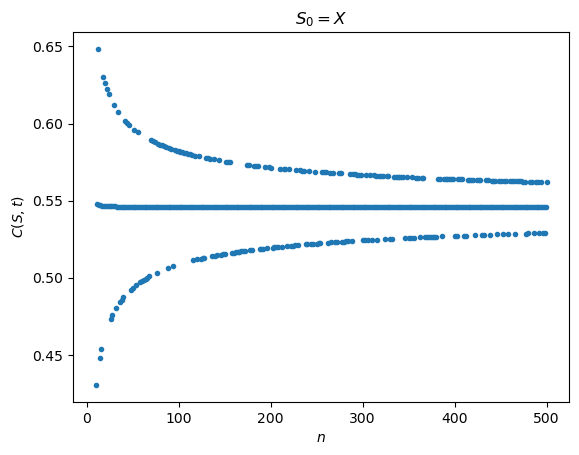

In [48]:
plt.plot(nArray,vArray,'.')
plt.xlabel('$n$')
plt.ylabel('$C(S,t)$')
plt.title( '$S_0 = X$' )
plt.show()

In [62]:
sZeroFrac = 0.923
nArray = np.zeros(no_of_results)
vArray = np.zeros(no_of_results)
for i in range(0,no_of_results):
    nArray[i] = 10+i
    vArray[i] = binomialBlackScholesToo(sZeroFrac*X, r, sigma, T,step_payoff,int(nArray[i]))

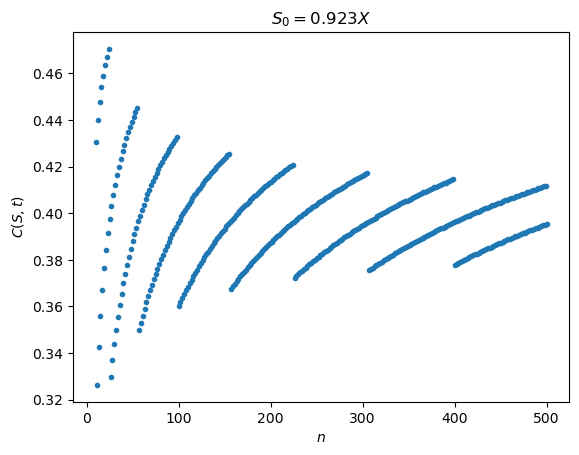

In [64]:
plt.plot(nArray,vArray,'.')
plt.xlabel('$n$')
plt.ylabel('$C(S,t)$')
plt.title( f'$S_0 = {sZeroFrac}X$' )
plt.show()

#### Heston-Zhou payoff
We begin by plotting the payoff, which is essentially a smoothed version of the step function.

In [57]:
def StockVals( S_0, r, sigma, T, n ):
    # Work out the time step and other useful numbers
    dt = T/n
    u = exp(sigma*sqrt(dt))
    d = 1./u
    q = (exp(r*dt) - d)/(u-d)

    # Work out the (n+1) values in the final column of the stock tree
    stock_val = np.zeros( n + 1 )
    for j in range(n+1):
        stock_val[j] = S_0 * pow(u, j) * pow(d, n-j) ;

    return( stock_val )

def HestonZhouPayoffs( X, stockVal ):
    n = stockVal.shape[0] - 1 # Number of generation in binomial tree
    payoff = np.zeros( n + 1 )
    for j in range(n+1):
        if (j > 0) and (j < n):
            if (X > (stockVal[j] + stockVal[j+1])/2.0):
                payoff[j] = 0.0
            elif (X < (stockVal[j] + stockVal[j-1])/2.0):
                payoff[j] = 1.0
            else: # ((stock_val[j] + stock_val[j+1])/2.0 >= X) and (X >= (stock_val[j] + stock_val[j-1])/2.0):
                payoff[j] = (stockVal[j+1] + stockVal[j] - 2.0*X)/(stockVal[j+1] + stockVal[j-1])
        elif X < stockVal[j]:
            payoff[j] = 1.0

    return payoff

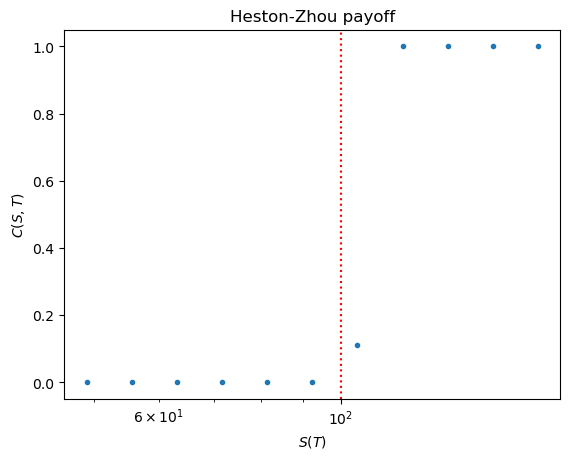

In [58]:
# Plot those puppies
stock_vals = StockVals( S_0, r, sigma, T, 10 )
payoffs = HestonZhouPayoffs( X, stock_vals )
ax = plt.gca()
ax.plot( stock_vals, payoffs, '.' )
ax.set_xscale('log')

# Add a dashed vertical line at the exercise price
plt.axvline( X, linestyle="dotted", c="red" )

ax.set_xlabel('$S(T)$')
ax.set_ylabel('$C(S,T)$')
ax.set_title( "Heston-Zhou payoff" )

plt.show()

In [59]:
@njit
def HestonZhou( S_0, r, sigma, X, T, n ):
    # Work out the time step and other useful numbers
    dt = T/n
    u = exp(sigma*sqrt(dt))
    d = 1./u
    q = (exp(r*dt) - d)/(u-d)

    # Work out the (n+1) values in the final column of the stock tree
    stock_val = np.zeros( n + 1 )
    for j in range(n+1):
        stock_val[j] = S_0 * pow(u, j) * pow(d, n-j) ;

    # Now work out the option value at maturity
    option_val = np.zeros( n + 1 )
    for j in range(n+1):
        if (j > 0) and (j < n):
            if (X > (stock_val[j] + stock_val[j+1])/2.0):
                option_val[j] = 0.0
            elif (X < (stock_val[j] + stock_val[j-1])/2.0):
                option_val[j] = 1.0
            else: # ((stock_val[j] + stock_val[j+1])/2.0 >= X) and (X >= (stock_val[j] + stock_val[j-1])/2.0):
                option_val[j] = (stock_val[j+1] + stock_val[j] - 2.0*X)/(stock_val[j+1] + stock_val[j-1])
        elif X < stock_val[j]:
            option_val[j] = 1.0

    # Now repeatedly construct the next column to the left in the
    # tree, replacing the entries in option_val as one goes
    discount_factor = exp(-r*dt )
    for i in range(n):
        n_nodes = n - i
        for j in range(n_nodes):
            option_val[j] = q*option_val[j+1] + (1 - q)*option_val[j]
            option_val[j] *= discount_factor

    # Return the sole t=0 value in the tree.
    return( option_val[0] )

In [65]:
no_of_results = 491

nArray = np.zeros(no_of_results)
vArray = np.zeros(no_of_results)
for i in range(no_of_results):
    nArray[i] = 10+i
    vArray[i] = HestonZhou(sZeroFrac*X, r, sigma, X, T, int(nArray[i]))

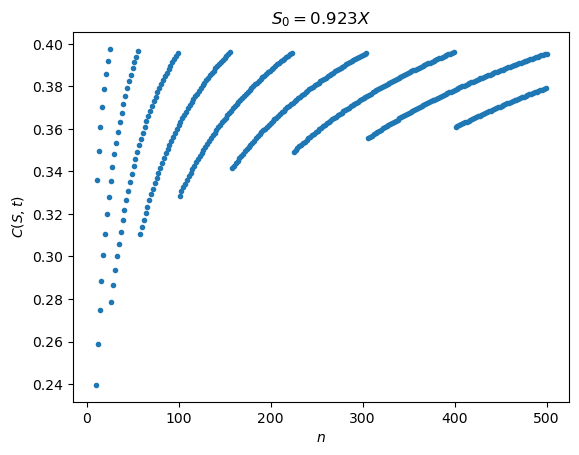

In [66]:
plt.plot(nArray,vArray,'.')
plt.xlabel('$n$')
plt.ylabel('$C(S,t)$')
plt.title( f'$S_0 = {sZeroFrac}X$' )
plt.show()

## References

Cox, J. C., Ross, S. A. & Rubinstein, M. (1979). "Option pricing: A simplified approach", *Journal of financial Economics* **7**(3):229--263.

Heston, S. & Zhou, G. (2000). "On the rate of convergence of discrete-time contingent claims", *Mathematical Finance* **10**(1):53--75.

Joshi, M. S. (2007). "The convergence of binomial trees for pricing the american put", *Available at SSRN 1030143*.

Leisen, D. P. & Reimer, M. (1996). "Binomial models for option valuation-examining and improving convergence", *Applied Mathematical Finance* **3**(4):319--346.

Rendleman, R. J. & Bartter, B. J.  (1979). "Two-state option pricing", *The Journal of Finance* **34**(5):1093--1110.
